<a href="https://colab.research.google.com/github/aryasharifi764/Data-Analysis-Report/blob/main/Data_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv("loans_dataset.csv")

df_raw.shape

(10000, 55)

In [3]:
keep_cols = [
    "interest_rate", "verified_income", "debt_to_income",
    "total_credit_utilized", "total_credit_limit",
    "public_record_bankrupt", "loan_purpose", "term",
    "inquiries_last_12m", "issue_month", "annual_income",
    "loan_amount", "grade", "emp_length", "homeownership"
]

df = df_raw[keep_cols].copy()

# rename inquiries_last_12m -> credit_checks
df.rename(columns={"inquiries_last_12m": "credit_checks"}, inplace=True)

df.head(10)


,interest_rate,verified_income,debt_to_income,total_credit_utilized,total_credit_limit,public_record_bankrupt,loan_purpose,term,credit_checks,issue_month,annual_income,loan_amount,grade,emp_length,homeownership
0,14.07,Verified,18.01,38767,70795,0,moving,60,6,Mar-2018,90000.0,28000,C,3.0,MORTGAGE
1,12.61,Not Verified,5.04,4321,28800,1,debt_consolidation,36,1,Feb-2018,40000.0,5000,C,10.0,RENT
2,17.09,Source Verified,21.15,16000,24193,0,other,36,4,Feb-2018,40000.0,2000,D,3.0,RENT
3,6.72,Not Verified,10.16,4997,25400,0,debt_consolidation,36,0,Jan-2018,30000.0,21600,A,1.0,RENT
4,14.07,Verified,57.96,52722,69839,0,credit_card,36,7,Mar-2018,35000.0,23000,C,10.0,RENT
5,6.72,Not Verified,6.46,3898,42100,0,other,36,6,Jan-2018,34000.0,5000,A,NaN,OWN
6,13.59,Source Verified,23.66,18916,291852,0,credit_card,60,1,Jan-2018,35000.0,24000,C,10.0,MORTGAGE
7,11.99,Source Verified,16.19,60805,342336,0,debt_consolidation,60,1,Jan-2018,110000.0,20000,B,10.0,MORTGAGE
8,13.59,Source Verified,36.48,69561,283190,0,home_improvement,36,3,Feb-2018,65000.0,20000,C,10.0,MORTGAGE
9,6.71,Not Verified,18.91,17768,33114,0,credit_card,36,0,Mar-2018,30000.0,6400,A,3.0,RENT


In [4]:
df.shape

(10000, 15)

In [5]:
# variables for part B.1(a)
b1_vars_cont = ["interest_rate", "annual_income", "debt_to_income", "loan_amount"]

# descriptive statistics: mean, median, sd, min, max
b1_descriptives = df[b1_vars_cont].agg(
    ["count", "mean", "median", "std", "min", "max"]
).T  # transpose so variables are rows

b1_descriptives


,count,mean,median,std,min,max
interest_rate,10000.0,12.427524,11.98,5.001105,5.31,30.94
annual_income,10000.0,79222.148412,65000.00,64734.290492,0.00,2300000.00
debt_to_income,9976.0,19.308192,17.57,15.004851,0.00,469.09
loan_amount,10000.0,16361.922500,14500.00,10301.956759,1000.00,40000.00


In [6]:
#List of the categorical variables for which you need counts and frequencies
b1_vars_cat = ["grade", "verified_income", "homeownership"]

b1_frequencies = {}
for var in b1_vars_cat:
    b1_frequencies[var] = df[var].value_counts()

b1_frequencies

{'grade': grade
 B    3037
 C    2653
 A    2459
 D    1446
 E     335
 F      58
 G      12
 Name: count, dtype: int64,
 'verified_income': verified_income
 Source Verified    4116
 Not Verified       3594
 Verified           2290
 Name: count, dtype: int64,
 'homeownership': homeownership
 MORTGAGE    4789
 RENT        3858
 OWN         1353
 Name: count, dtype: int64}

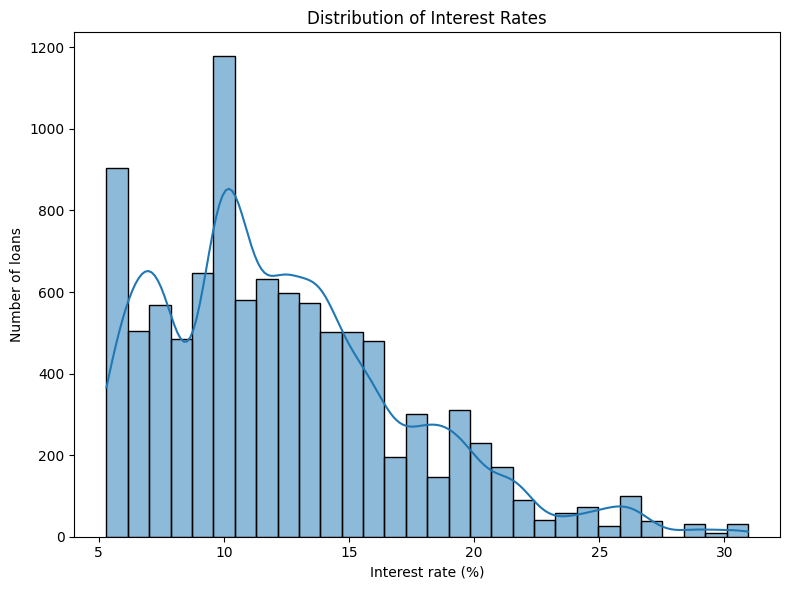

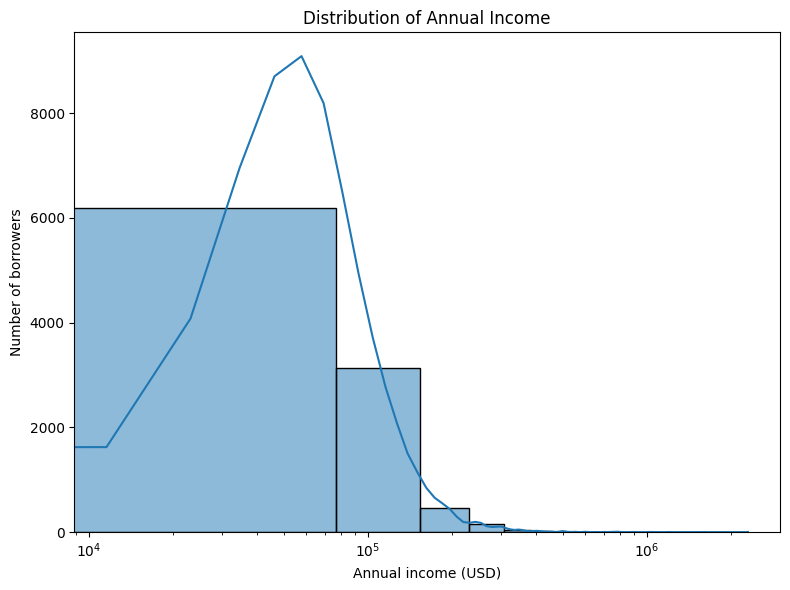

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram: interest_rate
plt.figure(figsize=(8, 6))
sns.histplot(df["interest_rate"], bins=30, kde=True)
plt.title("Distribution of Interest Rates")
plt.xlabel("Interest rate (%)")
plt.ylabel("Number of loans")
plt.tight_layout()
plt.show()

# Histogram: annual_income
plt.figure(figsize=(8, 6))
sns.histplot(df["annual_income"], bins=30, kde=True)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual income (USD)")
plt.ylabel("Number of borrowers")
plt.xscale("log")
plt.tight_layout()
plt.show()


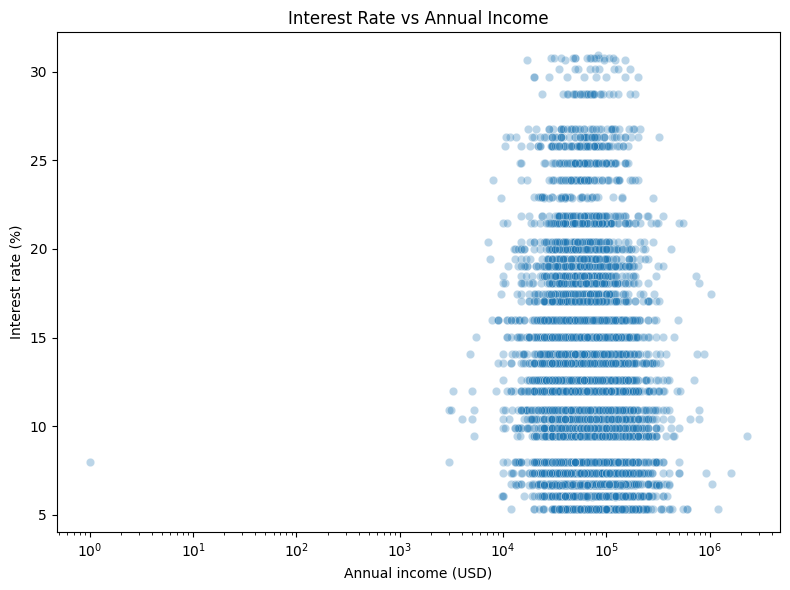

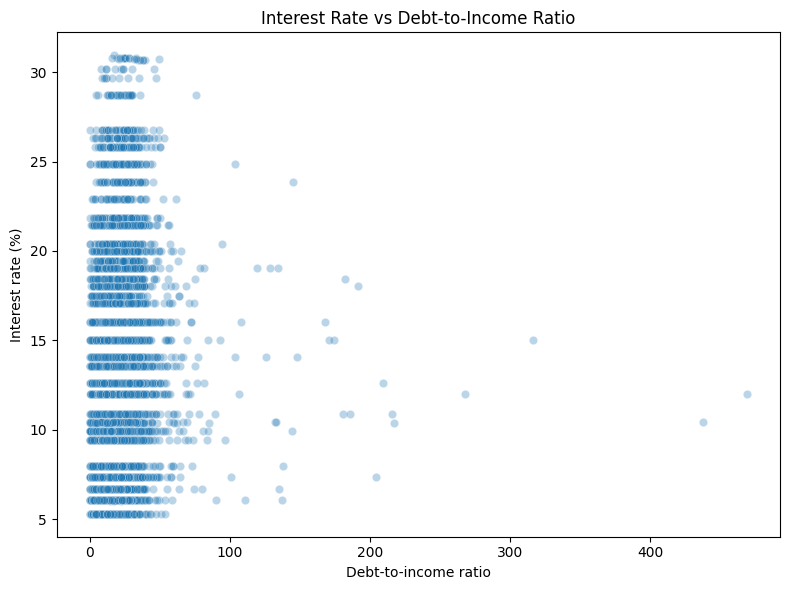

In [8]:
# Scatter: interest_rate vs annual_income
plt.figure(figsize=(8, 6))
sns.scatterplot(x="annual_income", y="interest_rate", data=df, alpha=0.3)
plt.title("Interest Rate vs Annual Income")
plt.xlabel("Annual income (USD)")
plt.ylabel("Interest rate (%)")
plt.xscale("log")
plt.tight_layout()
plt.show()

# Scatter: interest_rate vs debt_to_income
plt.figure(figsize=(8, 6))
sns.scatterplot(x="debt_to_income", y="interest_rate", data=df, alpha=0.3)
plt.title("Interest Rate vs Debt-to-Income Ratio")
plt.xlabel("Debt-to-income ratio")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()


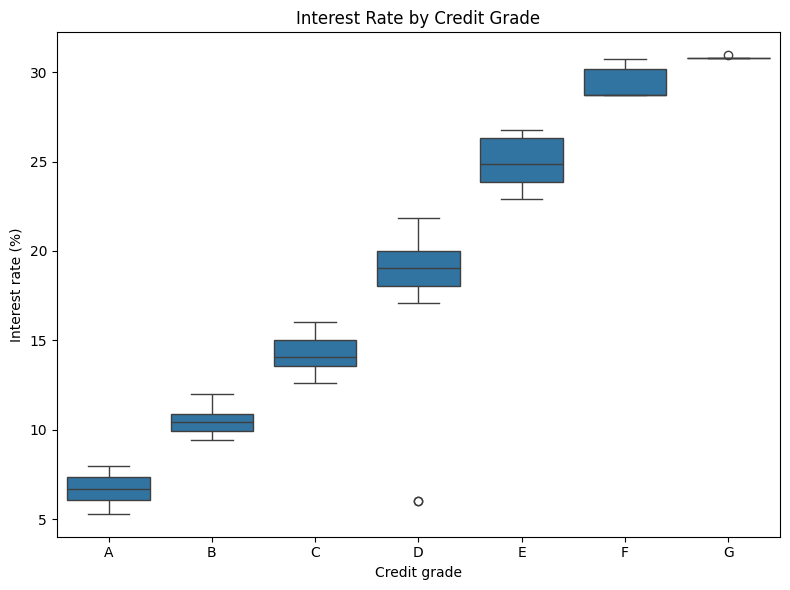

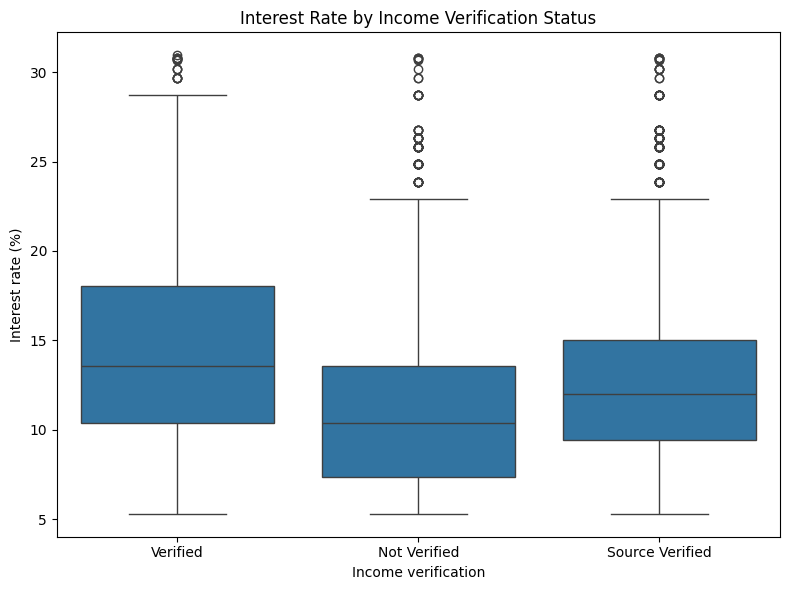

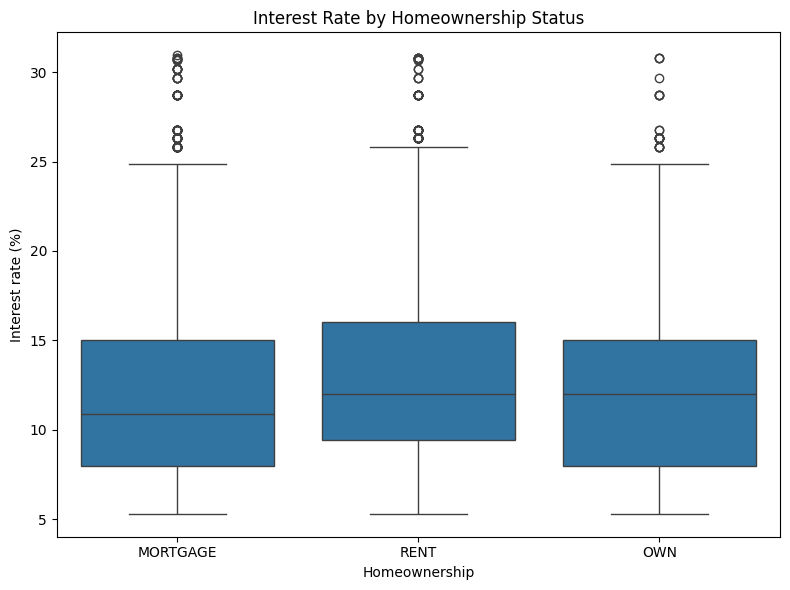

In [9]:
# Boxplot: interest_rate by grade
plt.figure(figsize=(8, 6))
sns.boxplot(x="grade", y="interest_rate", data=df, order=sorted(df["grade"].unique()))
plt.title("Interest Rate by Credit Grade")
plt.xlabel("Credit grade")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()

# Boxplot: interest_rate by verified_income
plt.figure(figsize=(8, 6))
sns.boxplot(x="verified_income", y="interest_rate", data=df)
plt.title("Interest Rate by Income Verification Status")
plt.xlabel("Income verification")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()

# Boxplot: interest_rate by homeownership
plt.figure(figsize=(8, 6))
sns.boxplot(x="homeownership", y="interest_rate", data=df)
plt.title("Interest Rate by Homeownership Status")
plt.xlabel("Homeownership")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()


In [10]:
# credit_util = total_credit_utilized / total_credit_limit
df["credit_util"] = df["total_credit_utilized"] / df["total_credit_limit"]
df.loc[df["total_credit_limit"] == 0, "credit_util"] = 0

# bankruptcy_dummy = 1 if public_record_bankrupt >= 1, else 0
df["bankruptcy_dummy"] = np.where(df["public_record_bankrupt"] >= 1, 1, 0)

# credit_util
credit_util_mean = df["credit_util"].mean()
credit_util_nonzero = (df["credit_util"] > 0).mean()

# bankruptcy_dummy
bankruptcy_mean = df["bankruptcy_dummy"].mean()
bankruptcy_nonzero = (df["bankruptcy_dummy"] > 0).mean()

credit_util_mean, credit_util_nonzero, bankruptcy_mean, bankruptcy_nonzero


(np.float64(0.40307696513838126),
 np.float64(0.9972),
 np.float64(0.1215),
 np.float64(0.1215))

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [12]:
# Model 1: simple linear regression
model1 = smf.ols("interest_rate ~ debt_to_income", data=df).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     204.2
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           7.05e-46
Time:                        23:09:58   Log-Likelihood:                -30105.
No. Observations:                9976   AIC:                         6.021e+04
Df Residuals:                    9974   BIC:                         6.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.5114      0.081    142.

In [13]:
# Model 2: simple linear regression with bankruptcy_dummy
model2 = smf.ols("interest_rate ~ bankruptcy_dummy", data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.22
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           1.47e-06
Time:                        23:09:58   Log-Likelihood:                -30274.
No. Observations:               10000   AIC:                         6.055e+04
Df Residuals:                    9998   BIC:                         6.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.3380      0.053  

In [14]:
# Model 3: Categorical Variable Regression
df["verified_income"] = df["verified_income"].astype("category")


model3 = smf.ols(
    "interest_rate ~ C(verified_income, Treatment(reference='Not Verified'))",
    data=df
).fit()

print(model3.summary())
avg_unverified = df.loc[df["verified_income"] == "Not Verified", "interest_rate"].mean()
avg_unverified


                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          8.92e-134
Time:                        23:09:58   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

np.float64(11.099457429048414)

In [15]:
# MODEL 4: multiple regression
model4 = smf.ols(
    'interest_rate ~ debt_to_income + credit_util + bankruptcy_dummy',
    data=df
).fit()

print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     279.9
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          1.85e-174
Time:                        23:09:58   Log-Likelihood:                -29803.
No. Observations:                9976   AIC:                         5.961e+04
Df Residuals:                    9972   BIC:                         5.964e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.8708      0.102  

In [16]:
# MODEL 5: Enhanced multiple regression
model5 = smf.ols(
    "interest_rate ~ debt_to_income + credit_util + bankruptcy_dummy"
    " + annual_income + loan_amount"
    " + C(term)"
    " + C(grade)"
    " + C(emp_length)"
    " + C(homeownership)"
    " + C(loan_purpose)"
    " + credit_checks",
    data=df
).fit()

print(model5.summary())

# Residuals for first five observations
residuals_first5 = model5.resid.head(5)
print(residuals_first5)


                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     5042.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:09:58   Log-Likelihood:                -13870.
No. Observations:                9182   AIC:                         2.781e+04
Df Residuals:                    9145   BIC:                         2.808e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [21]:

# 1. Compute benchmark mean rate for A‑grade, 36‑month loans
bench_rate = df.loc[(df["grade"] == "A") & (df["term"] == 36), "interest_rate"].mean()

# 2. Create the dependent variable
df["risk_premium"] = df["interest_rate"] - bench_rate

# Now run your model
formula = (
    "risk_premium ~ debt_to_income + credit_util + total_credit_limit "
    "+ annual_income + loan_amount + credit_checks + bankruptcy_dummy "
    "+ C(grade) + C(verified_income) + C(term) + C(emp_length) "
    "+ C(homeownership) + C(loan_purpose)"
)

modelE = smf.ols(formula=formula, data=df).fit()
print(modelE.summary())


                            OLS Regression Results                            
Dep. Variable:           risk_premium   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     4678.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:13:03   Log-Likelihood:                -13846.
No. Observations:                9182   AIC:                         2.777e+04
Df Residuals:                    9142   BIC:                         2.806e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------